## Loan application MLP Model

In [25]:
import os
import numpy as np
import pandas as pd

In [26]:
df = pd.read_excel('Loan_Application.xlsx')
df.head()

,ID,Decision,Selfcon_Code,Tier_1,Tier_2,AccoClass,LoanType,Gender,Etype,Doc_pf,...,Term,Dwnpay,BankSave,CalcEmi,IIR,IAR,FOIR,LTV,LVR,dwnp_prop_p
0,1,0,1,0,0,0,1,0,1,0,...,84,300000,0,4087.159912,7.999922,11.000000,22.300176,40.000000,40.0,60.000000
1,2,0,1,0,0,0,1,0,0,1,...,180,130000,0,4924.810059,21.999509,38.999129,32.858975,71.000036,71.0,28.888889
2,3,1,1,0,0,0,0,0,1,1,...,84,557000,0,11712.969727,36.000030,56.000047,36.000030,17.999999,47.0,52.696310
3,4,1,1,0,0,1,1,0,1,1,...,180,666500,0,15390.040039,36.999736,52.999656,36.999736,56.000009,60.0,39.993999
4,5,1,1,0,0,0,1,0,1,1,...,180,151000,0,15390.040039,40.999654,57.000148,40.999654,51.000008,87.0,13.119027


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1570 entries, 0 to 1569
Data columns (total 38 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            1570 non-null   int64  
 1   Decision      1570 non-null   int64  
 2   Selfcon_Code  1570 non-null   int64  
 3   Tier_1        1570 non-null   int64  
 4   Tier_2        1570 non-null   int64  
 5   AccoClass     1570 non-null   int64  
 6   LoanType      1570 non-null   int64  
 7   Gender        1570 non-null   int64  
 8   Etype         1570 non-null   int64  
 9   Doc_pf        1570 non-null   int64  
 10  Marstat       1570 non-null   int64  
 11  Emp_Type_1    1570 non-null   int64  
 12  Emp_Type_2    1570 non-null   int64  
 13  Emp_Type_3    1570 non-null   int64  
 14  Educlass_2    1570 non-null   int64  
 15  Educlass_1    1570 non-null   int64  
 16  Oriclass_1    1570 non-null   int64  
 17  Oriclass_2    1570 non-null   int64  
 18  eom_25        1570 non-null 

In [28]:
x = df.iloc[:,2:]
y = df.iloc[:,1]

In [29]:
y.value_counts()

Decision
1    1255
0     315
Name: count, dtype: int64

In [30]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split(x,y, test_size= 0.2, random_state=0, stratify = y)

In [31]:
x_train.shape

(1256, 36)

In [32]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [33]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [34]:
num_input = x.shape[1]

In [35]:
classifier = Sequential()
classifier.add(Dense(input_dim= num_input, activation='relu', units=50))
classifier.add(Dense(activation='sigmoid', units=1))
classifier.summary()

c:\Users\ardra\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 50)             │         1,850 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,901 (7.43 KB)

 Trainable params: 1,901 (7.43 KB)

 Non-trainable params: 0 (0.00 B)

In [36]:
classifier.compile(optimizer='adam', loss= 'binary_crossentropy', metrics= ['accuracy'])
hist= classifier.fit(x_train,y_train, validation_data=(x_test,y_test), batch_size= 32, epochs= 100)
from sklearn.metrics import accuracy_score
y_pred = classifier.predict(x_test)
y_pred = y_pred>0.5

Epoch 1/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.6694 - loss: 0.6135 - val_accuracy: 0.7675 - val_loss: 0.5155
Epoch 2/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7987 - loss: 0.4771 - val_accuracy: 0.7994 - val_loss: 0.4733
Epoch 3/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8003 - loss: 0.4447 - val_accuracy: 0.8025 - val_loss: 0.4521
Epoch 4/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8225 - loss: 0.4195 - val_accuracy: 0.8025 - val_loss: 0.4387
Epoch 5/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8385 - loss: 0.3885 - val_accuracy: 0.8057 - val_loss: 0.4259
Epoch 6/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8368 - loss: 0.3786 - val_accuracy: 0.8025 - val_loss: 0.4210
Epoch 7/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8416 - loss: 0.3618 - val_accuracy: 0.8089 - val_loss: 0.4159
Epoch 8/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8463 - loss: 0.3470 - val_accuracy: 0.8089 - 

In [37]:
print(accuracy_score(y_test,y_pred))

0.7898089171974523


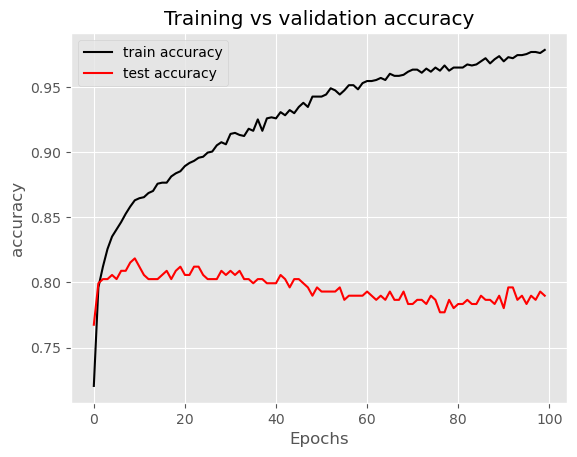

In [38]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.plot(np.arange(0,100), hist.history['accuracy'], label='train accuracy', color= 'black')
plt.plot(np.arange(0,100), hist.history['val_accuracy'], label='test accuracy', color='red')
plt.title('Training vs validation accuracy')
plt.ylabel("accuracy")
plt.xlabel('Epochs')
plt.legend()
plt.show()

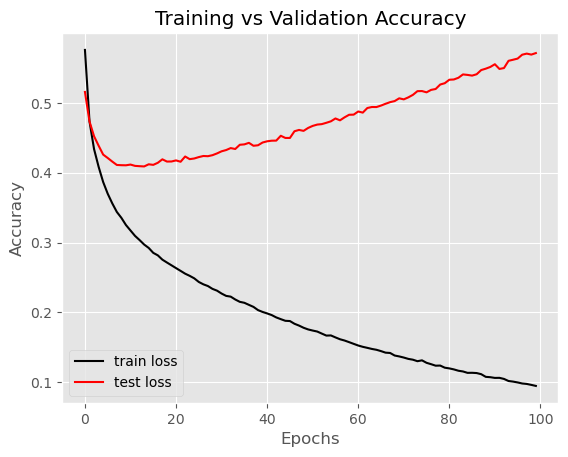

In [39]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.plot(np.arange(0,100), hist.history['loss'], label='train loss', color='black')
plt.plot(np.arange(0,100), hist.history['val_loss'], label='test loss', color='red')
plt.title("Training vs Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()